# Implementation des Réseaux de Neurone Artificiel

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Création du Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


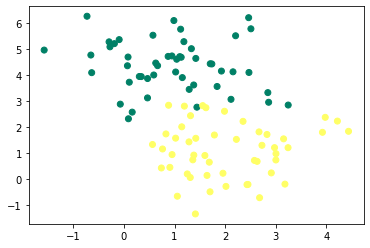

In [100]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

## Création de la fonction d'initialisation
![image](84.png)

In [101]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

## Testons la Fonction d'Initialisation

In [102]:
w, b = initialisation(X)
print(f'La taille de w: {w.shape}')
print(f'La taille de b: {b.shape}')

print(f'w: {w}\nb:{b}')

La taille de w: (2, 1)
La taille de b: (1,)
w: [[0.15972912]
 [0.88707996]]
b:[1.7866817]


## Création du Modèle
![image](model.png)

### Création de la Fonction Sigmoïd

In [82]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [104]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

## Testons le Modèle

In [105]:
A = model(X, w, b)
print(f'Shape de A: {A.shape}')

Shape de A: (100, 1)


## La Fonction Coût de Notre Modèle
![image](fonction_cout.png)

In [106]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [107]:
loss = log_loss(A, y)

In [108]:
loss

2.9321538031076733

## Les Gradients de Notre Modèle
![image](gradients.png)

In [109]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

## Testons les Gradients

In [110]:
dw, db = gradients(X, A, y)
print(f'Shape de dw: {dw.shape}\ndb: {db}')

Shape de dw: (1, 2)
db: 3.215940495699665


## Mise à Jour des Gradients

![image](update.png)

In [111]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

## Testons la Mise à Jour des Gradients

In [112]:
update(dw, db, w, b, 0.05)

(array([[0.11142288, 0.04789383],
        [0.83877372, 0.77524467]]),
 array([1.62588468]))

## Entrainement du Modèle
![image](train_cnn.png)

In [93]:
from sklearn.metrics import accuracy_score

In [113]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [119]:
 def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)
    

## Testons Notre Modèle

0.86


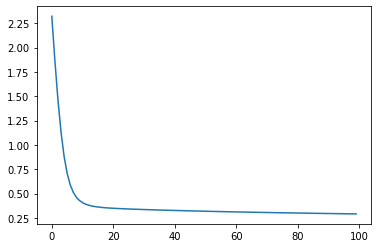

In [120]:
W, b = artificial_neuron(X, y)